<h1><center> Analysis and Visualisation of heart disease data<center></h1>
<h1><center>Make a Prediction Model<center></h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heartFailData.csv")

In [4]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
# 0:NO Death 1:Death
df1=df['DEATH_EVENT'].value_counts()
df1

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
#how many of each sex in the dataset
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

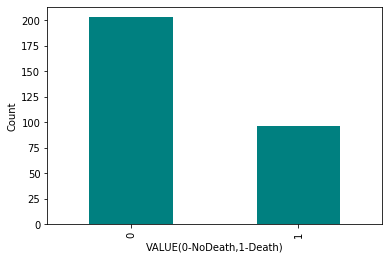

In [9]:
df1.plot(kind='bar',color='teal')
plt.xlabel("VALUE(0-NoDeath,1-Death)")
plt.ylabel("Count")
plt.show()

<h5>Importing Seaborn library and plotting various possible causes leading to death</h5>


In [10]:
import seaborn as sns

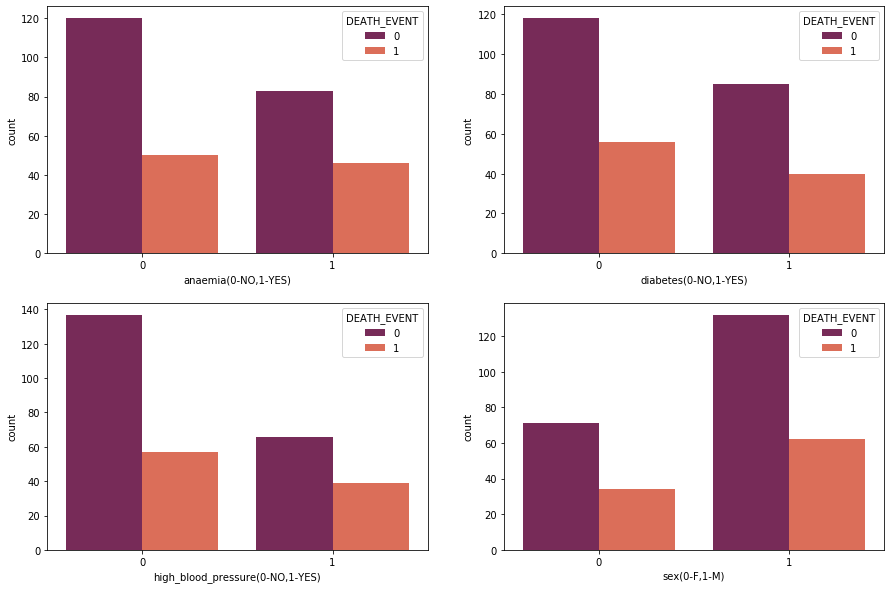

In [11]:
#4 subplots
fig=plt.figure(figsize=(15,10))
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)
sns.countplot("anaemia", hue="DEATH_EVENT",palette="rocket", data=df,ax=ax0)
ax0.set_xlabel("anaemia(0-NO,1-YES)")

sns.countplot("diabetes", hue="DEATH_EVENT",palette="rocket", data=df,ax=ax1)
ax1.set_xlabel("diabetes(0-NO,1-YES)")

sns.countplot("high_blood_pressure", hue="DEATH_EVENT",palette="rocket",data=df,ax=ax2)
ax2.set_xlabel("high_blood_pressure(0-NO,1-YES)")

sns.countplot("sex", hue="DEATH_EVENT",palette="rocket", data=df,ax=ax3)
ax3.set_xlabel("sex(0-F,1-M)")

plt.show()

Few results from the above analysis
1. When Anaemic, the difference between the two possible outcomes(death/no death) has reduced (% of a death occuring has increased) and hence a person is more likely to have heart conditions when anaemic.
2. Same is the case with diabetes and high blood pressure
3. Well it is said that men are more prone to heart attacks, the above analysis shows otherwise.

<h5> Scatter plot visualising various factor and there values when 1)Death takes place 2)Death does not take place

In [13]:
df3=df[df['DEATH_EVENT']==1]  #dataframe when death occurs
df4=df[df['DEATH_EVENT']==0]  #dataframe when death doesn't occur

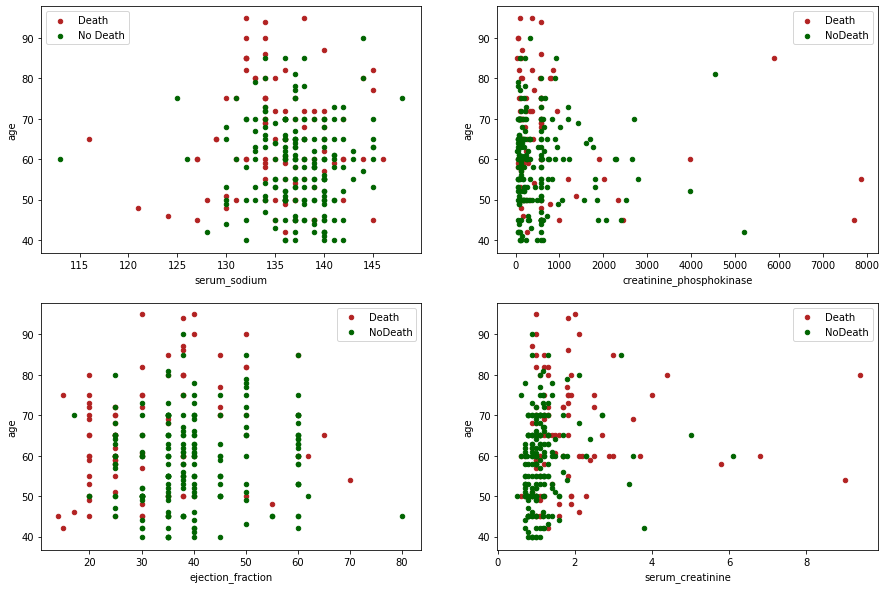

In [14]:
#4 scatter subplots
fig=plt.figure(figsize=(15,10))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#df3=death takes place
#df4=death does not take place
df3.plot(x='serum_sodium',y='age',color='firebrick',ax=ax0,kind='scatter')
df4.plot(x='serum_sodium',y='age',color='darkgreen',ax=ax0,kind='scatter')

df3.plot(x='creatinine_phosphokinase',y='age',color='firebrick',ax=ax1,kind='scatter')
df4.plot(x='creatinine_phosphokinase',y='age',color='darkgreen',ax=ax1,kind='scatter')

df3.plot(x='ejection_fraction',y='age',color='firebrick',ax=ax2,kind='scatter')
df4.plot(x='ejection_fraction',y='age',color='darkgreen',ax=ax2,kind='scatter')

df3.plot(x='serum_creatinine',y='age',color='firebrick',ax=ax3,kind='scatter')
df4.plot(x='serum_creatinine',y='age',color='darkgreen',ax=ax3,kind='scatter')

ax0.legend(labels={"Death",'No Death'})
ax1.legend(labels={"Death",'NoDeath'})
ax2.legend(labels={"Death",'NoDeath'})
ax3.legend(labels={"Death",'NoDeath'})

plt.show()

Few analysis results
1.When ejectionFraction is less, death is likely to occur
2.When serum_creatinine is high, death is likely to occur
3.Serum sodium and creatinine phosphokinase have no significant link to death occurance

<h2>Logistic Regression</h2>

In [16]:
from sklearn import preprocessing 

In [17]:
from sklearn.linear_model import LogisticRegression
x_data = df.drop(['DEATH_EVENT'], axis = 1)
Y=df[['DEATH_EVENT']]
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
X=preprocessing.StandardScaler().fit(X).transform(X)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.6,random_state=2)

In [19]:
LR=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
ans2=LR.predict(x_test)

C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,ans2)

C:\Users\91812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8611111111111112

<h3> Accuracy for LogisticRegression is 86% </h3>

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test,ans2)

0.8611111111111112

In [23]:
#checking individual role that below given play in a DEATH EVENT taking place

b=[]
for a in ['creatinine_phosphokinase','age','serum_creatinine','serum_sodium']:
    X=df[[a]]
    Y=df[['DEATH_EVENT']]
    X=preprocessing.StandardScaler().fit(X).transform(X)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.7,random_state=2)

    LR2=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
    ans3=LR2.predict(x_test)
    b.append(metrics.accuracy_score(y_test,ans3))


C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

<h4> Individual Accuracy of above 4 attributes in determining the death event</h4>

In [24]:
b

[0.6619047619047619,
 0.6952380952380952,
 0.6904761904761905,
 0.6857142857142857]

<h1><center>SECOND DATASET of HEART CONDITION</h1>

In [25]:
df_new=pd.read_csv("heart.csv")
df_new.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [26]:
df_new=df_new.rename(columns={'trestbps':'resting_BP',"chol":"cholestrol",'thalach':'max_heart_rate'})

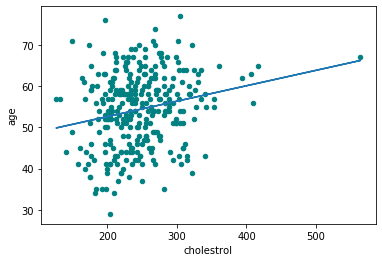

In [28]:
y=df_new['age']
x=df_new['cholestrol']
df_new.plot(y='age',x='cholestrol',kind='scatter',color='teal')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()

#INCREASE IN AGE LEADS TO INCREASE OF CHOLESTROL 

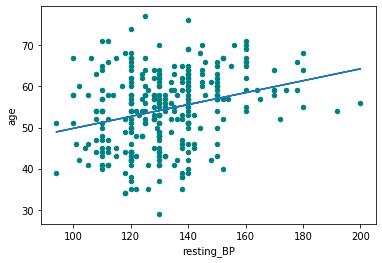

In [29]:
x=df_new['resting_BP']
df_new.plot(y='age',x='resting_BP',kind='scatter',color='teal')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()

#INCREASE IN AGE LEADS TO HIGH RESTING BLOOD PRESSURE

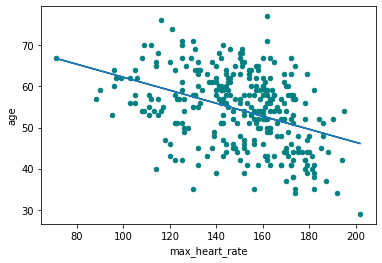

In [25]:
x=df_new['max_heart_rate']
df_new.plot(y='age',x='max_heart_rate',kind='scatter',color='teal')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()

#INCREASE IN AGE LEADS TO LESSER "MAX_HEART_RATE" ACHIEVED

<h1>ML MODELS</h1>

<h3>Logistic Regression</h3>
<h4>Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.</h4>

In [144]:

x_data = df_new.drop(['target'], axis = 1)
Y=df_new[['target']]

X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
X=preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.6,random_state=2)

LR3=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
log_pred=LR3.predict(x_test)

c=(metrics.accuracy_score(y_test,log_pred))


C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
print("Accuracy of logistic Regression is ", c)
acc={}
acc['LogisticReg']=c

Accuracy of logistic Regression is  0.8351648351648352


<h3>KNN Classification</h3>
<h4>The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm to solve both classification and regression problems</h4>

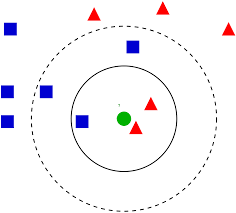

In [3]:
from IPython.display import Image
Image(filename='pic1.png')

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
import numpy as np
k=10
mean_acc=np.zeros(k-1)
std_acc=np.zeros(k-1)
for n in range(1,k):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    KNN_pred=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,KNN_pred)
    print(mean_acc[n-1])

0.7912087912087912
0.8186813186813187
0.8351648351648352
0.8571428571428571
0.8516483516483516
0.8351648351648352
0.8186813186813187
0.8351648351648352
0.8186813186813187


C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

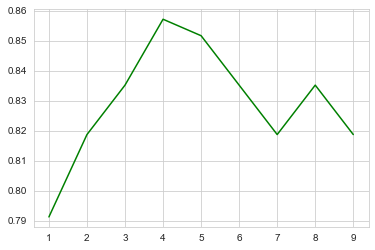

In [149]:
plt.plot(range(1,k),mean_acc,'g')
plt.show()
#peak is clearly at k=4

In [150]:
print("Max accuracy of KNN Classification:", mean_acc[3])
pred_KNN=mean_acc[3]
acc['KNN']=pred_KNN

Max accuracy of KNN Classification: 0.8571428571428571


<h3>Decision Tree Classification</h3>
<h4>Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.</h4>

In [151]:
from sklearn import tree

In [152]:
from sklearn.tree import DecisionTreeClassifier
a=[]
for n in range(1,10):
    tree=DecisionTreeClassifier(max_depth=n)
    tree.fit(x_train,y_train)
    pred_tree=tree.predict(x_test)
    a.append(metrics.accuracy_score(y_test,pred_tree))
print(a)

[0.7637362637362637, 0.7307692307692307, 0.7472527472527473, 0.7747252747252747, 0.7417582417582418, 0.7362637362637363, 0.7252747252747253, 0.7472527472527473, 0.7307692307692307]


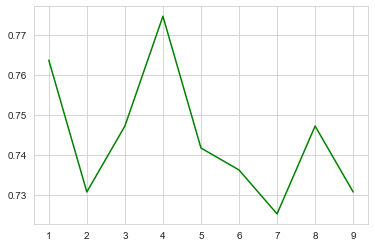

In [153]:
plt.plot(range(1,10),a,'g')
plt.show()

In [154]:
#Clearly the peak is at a depth of 4
tree_pred=a[3]
print("Max accuracy of Decision Tree is: ", tree_pred)
acc['DecisionTree']=tree_pred

Max accuracy of Decision Tree is:  0.7747252747252747


<h3>Support Vector Machine (SVM)</h3>
<h4>A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.</h4>

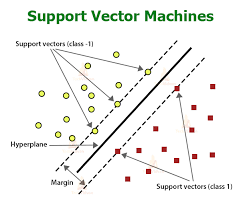

In [2]:
from IPython.display import Image
Image(filename='pic2.png')


In [155]:
from sklearn import svm

In [156]:
ob=svm.SVC(kernel='rbf')
ob.fit(x_train,y_train)
svm_pred=ob.predict(x_test)
print("Accuracy of SVM is:",metrics.accuracy_score(y_test,svm_pred))
acc['SVM']=metrics.accuracy_score(y_test,svm_pred)

Accuracy of SVM is: 0.8406593406593407


C:\Users\91812\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h3>Finding maximum accuracy among the 4 Model</h3>

In [157]:
acc

{'LogisticReg': 0.8351648351648352,
 'KNN': 0.8571428571428571,
 'DecisionTree': 0.7747252747252747,
 'SVM': 0.8406593406593407}

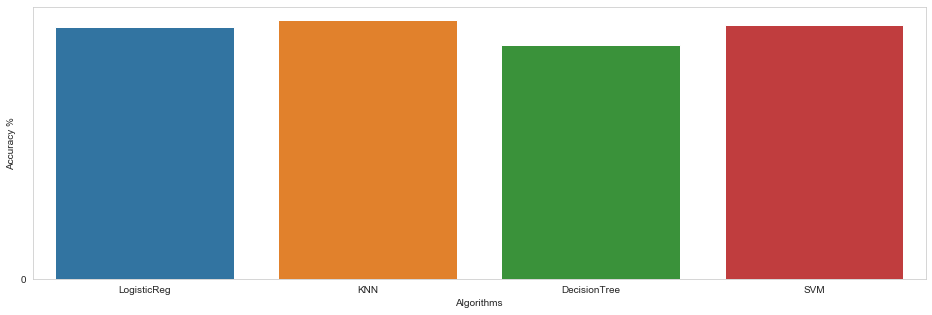

In [168]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
sns.set_style("whitegrid")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(acc.keys()), y=list(acc.values()))
plt.show()

<h1>KNN works best with the accuracy of 85.7 %</h1>